In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import BabsonAnalytics
%matplotlib inline

In [2]:
from sklearn import linear_model

# Load

In [3]:
df = pd.read_csv('../data/BostonHousing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


# Manage

In [4]:
df = df.drop('MEDV', axis=1)
df['CAT. MEDV'].replace([0,1],['Low','High'],inplace=True)

# Partition

In [5]:
train = df.sample(frac=0.8)
test = df.drop(train.index)

trainTarget = train.pop('CAT. MEDV')
testTarget = test.pop('CAT. MEDV')

# Build

In [6]:
model = linear_model.LogisticRegression(fit_intercept=True)
model.fit(train,trainTarget);

# Predict

In [8]:
predictions = model.predict(test)

# Evaluate

In [11]:
error_rate = sum(predictions != testTarget)/len(predictions)
bench_rate = BabsonAnalytics.benchmarkErrorRate(trainTarget,testTarget)
print('Error rate:\t', error_rate)
print('Benchmark:\t',bench_rate)

Error rate:	 0.029702970297
Benchmark:	 0.0990099009901


In [12]:
confusion_matrix = BabsonAnalytics.confusionMatrix(predictions,testTarget)
confusion_matrix

Observations,High,Low
Predictions,,
High,8,1
Low,2,90


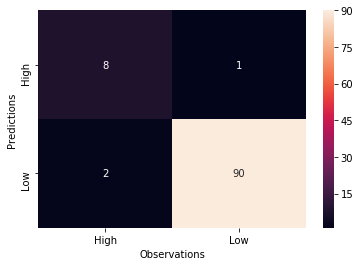

In [13]:
sns.heatmap(confusion_matrix,annot=True)

# Variable Selection

Here we'll use recursive feature elimination (RFE) to prune back the number of variables we're using. The hope is that we'll end up with a smaller collection of variables that do about as good of a job at predicting the target as the full data set. A smaller number of predictors are cheaper and easier to collect, clean, and store, and fewer data points means faster fitting and predicting. Moreover, we can clearly draw a line between the variables that matter and the variables that don't. 

In [15]:
from sklearn import feature_selection
model = linear_model.LogisticRegression();
rfe = feature_selection.RFE(model,2)
rfe.fit(train,trainTarget)

BabsonAnalytics.inspectLinearModel(train=train,trainTarget=trainTarget,model=rfe)

predictions = rfe.predict(test)

error_rate = sum(predictions != testTarget)/len(predictions)
bench_rate = BabsonAnalytics.benchmarkErrorRate(trainTarget,testTarget)
print('Error rate: ', error_rate)
print('Benchmark: ',bench_rate)



ValueError: could not convert string to float: 'Low'